In [17]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import XXDBinning as binning
import warnings
warnings.filterwarnings("ignore")

# 1.数据

In [18]:
# 数据读取
df = pd.read_csv("/Users/zfwang/machinelearning/mlproj/src/utils/binning/data.csv")
with pd.option_context("display.max_column", None):
    print(df.head())
print("df's shape: ", df.shape)

# 训练数据、测试数据分割
train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 100, stratify = df.flgGood)
print("train_df's shape: ", train_df.shape)
print("test_df's shape: ", test_df.shape)

      cust_id  applicant_age  loan_id  amt_req  rent_own  mthly_rent_amt  \
0  3e4519270a             59        1      500         1             500   
1  a7ff4f3fd5             44        1      500         1            1025   
2  3466ce11fa             53        1      500         0             500   
3  e2c803a12c             33        1      500         1             350   
4  6fc1957477             40        1      500         0             850   

   bank_acct_dd  loan_dur  pmt_ach  nm_pmt  pmt_amt  amt_aprv  dur_aprv  \
0             1         5        1       5   193.91       500         5   
1             0         3        1       6   138.48       500         3   
2             1         6        1      13    77.39       500         6   
3             1         5        1       5   193.91       500         5   
4             1         6        1      13    77.39       500         6   

   pmt_amt_aprv            county primary_city state     domain  \
0        193.91  Minnehah

# 2.数值特征分箱

In [19]:
nb = binning.XXDNumberBin()

## 2.1 数值型等频分箱

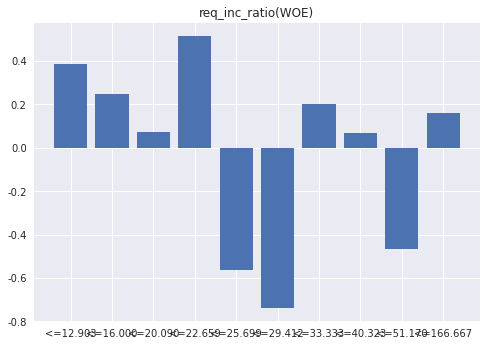

Cutoff:[12.90322581, 16.0, 20.09040683, 22.65861027, 25.69868294, 29.41176471, 33.33333333, 40.32258065, 51.16959064, 166.66666669999998]


171    0.074559
48     0.161571
440   -0.564366
536    0.066260
46     0.161571
         ...   
43     0.248582
495    0.066260
556    0.074559
89     0.200791
513    0.248582
Name: req_inc_ratio, Length: 197, dtype: float64

In [20]:
nb.pct_bin(train_df, 'req_inc_ratio', 'flgGood', max_bin = 10)
nb.get_bin_stats()
nb.plot_woe()
nb.trans_to_woe(test_df['req_inc_ratio'])

In [24]:
dir(nb)

['_XXDNumberBin__bin_stats',
 '_XXDNumberBin__cc',
 '_XXDNumberBin__varname',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'calc_stats',
 'get_bin_stats',
 'get_cutoff',
 'get_iv',
 'get_varname',
 'manual_bin',
 'monotone_bin',
 'pct_bin',
 'plot_woe',
 'trans_bin_to_woe',
 'trans_to_bin',
 'trans_to_woe']

In [30]:
nb._XXDNumberBin__bin_stats

,Var,Range,Min,Max,CntRec,CntGood,CntBad,Pct,PctBad,PctGood,BadRate,CumGood,CumBad,Odds,LnOdds,WoE,IV,TotalIV
bin,,,,,,,,,,,,,,,,,,
1,req_inc_ratio,<=12.903,3.947368,12.903226,45,20,25,0.098039,0.118483,0.080645,0.555556,20,25,1.250000,0.223144,0.384714,0.014557,0.156555
2,req_inc_ratio,<=16.000,12.987013,16.000000,46,22,24,0.100218,0.113744,0.088710,0.521739,42,49,1.090909,0.087011,0.248582,0.006223,0.156555
3,req_inc_ratio,<=20.090,16.129032,20.090407,46,24,22,0.100218,0.104265,0.096774,0.478261,66,71,0.916667,-0.087011,0.074559,0.000559,0.156555
4,req_inc_ratio,<=22.659,20.174849,22.658610,46,19,27,0.100218,0.127962,0.076613,0.586957,85,98,1.421053,0.351398,0.512968,0.026341,0.156555
5,req_inc_ratio,<=25.699,22.727273,25.698683,46,31,15,0.100218,0.071090,0.125000,0.326087,116,113,0.483871,-0.725937,-0.564366,0.030425,0.156555
6,req_inc_ratio,<=29.412,25.806452,29.411765,45,32,13,0.098039,0.061611,0.129032,0.288889,148,126,0.406250,-0.900787,-0.739216,0.049839,0.156555
7,req_inc_ratio,<=33.333,29.629630,33.333333,51,25,26,0.111111,0.123223,0.100806,0.509804,173,152,1.040000,0.039221,0.200791,0.004501,0.156555
8,req_inc_ratio,<=40.323,33.898305,40.322581,42,22,20,0.091503,0.094787,0.088710,0.476190,195,172,0.909091,-0.095310,0.066260,0.000403,0.156555
9,req_inc_ratio,<=51.170,40.404040,51.169591,46,30,16,0.100218,0.075829,0.120968,0.347826,225,188,0.533333,-0.628609,-0.467038,0.021081,0.156555


## 2.2 手动调整分箱

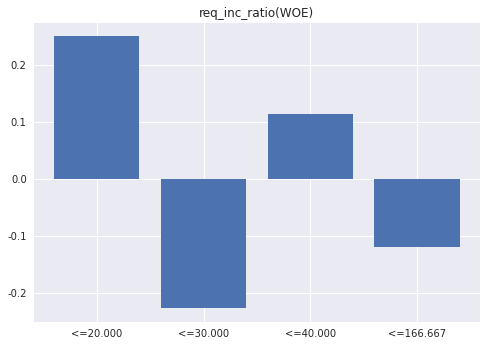

Cutoff:[20.0, 30.0, 40.0, 166.66666669999998]


171    0.249863
48    -0.119842
440   -0.226800
536    0.113943
46    -0.119842
         ...   
43     0.249863
495    0.113943
556    0.249863
89    -0.226800
513    0.249863
Name: req_inc_ratio, Length: 197, dtype: float64

In [12]:
nb.manual_bin(train_df, 'req_inc_ratio', 'flgGood', [20, 30, 40])
nb.get_bin_stats()
nb.plot_woe()
nb.trans_to_woe(test_df['req_inc_ratio'])

## 2.3 自动单调分箱

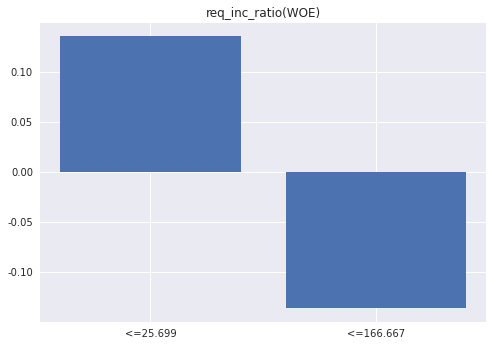

Cutoff:[25.69868294, 166.66666669999998]


171    0.135368
48    -0.136264
440    0.135368
536   -0.136264
46    -0.136264
         ...   
43     0.135368
495   -0.136264
556    0.135368
89    -0.136264
513    0.135368
Name: req_inc_ratio, Length: 197, dtype: float64

In [13]:
nb.monotone_bin(train_df, 'req_inc_ratio', 'flgGood', max_bin = 3)
nb.get_bin_stats()
nb.plot_woe()
nb.trans_to_woe(test_df['req_inc_ratio'])

# 3.字符分箱

In [14]:
cb = binning.XXDCharBin()

## 3.1 自动分箱

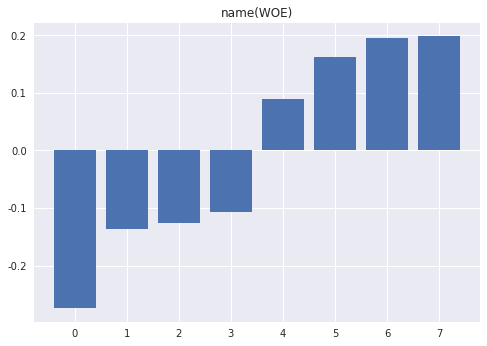

0        [yuqing]
1            [qq]
2            [yq]
3       [jack ma]
4            [dd]
5           [xxd]
6    [xuxiaodong]
7           [nan]
Name: Range, dtype: object


171    0.197938
48     0.090112
440    0.161571
536    0.194360
46     0.197938
         ...   
43     0.161571
495   -0.273747
556   -0.126111
89     0.161571
513   -0.273747
Name: woe, Length: 197, dtype: float64

In [15]:
cb.pct_bin(train_df, 'name', 'flgGood')
cb.get_bin_stats()
cb.plot_woe()
cb.trans_to_woe(test_df['name'])

## 3.2 字符型手动分箱

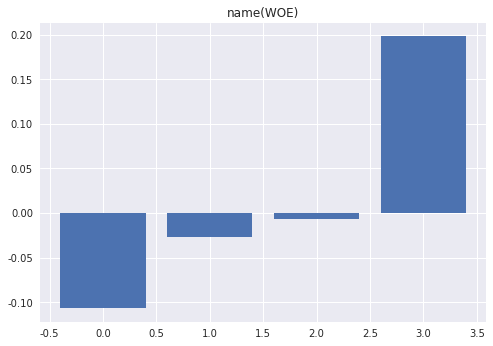

0               [jack ma]
1    [xuxiaodong, yuqing]
2       [yq, dd, xxd, qq]
3                   [nan]
Name: Range, dtype: object


171    0.197938
48    -0.006223
440   -0.006223
536   -0.027021
46     0.197938
         ...   
43    -0.006223
495   -0.027021
556   -0.006223
89    -0.006223
513   -0.027021
Name: woe, Length: 197, dtype: float64

In [16]:
cb.manual_bin(
    train_df, 
    'name', 
  'flgGood', 
  [['yuqing', 'xuxiaodong'], ['jack ma'], ['yq', 'dd', 'xxd', 'qq']]
)
cb.get_bin_stats()
cb.plot_woe()
cb.trans_to_woe(test_df['name'])